In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tex
from utils import bound
np.set_printoptions(suppress = True,precision = 9)

In [4]:
print(data)

[[ 0.178103737  0.191711145  0.492584151  0.51137022   0.423774853
   0.858891565  0.739069546  0.025482493 77.520869874]
 [ 0.07620342   0.095315416  0.31184418   0.331890621  0.284718345
   0.836307343  0.73709309   0.018601423 79.198535084]
 [ 0.039705872  0.044885248  0.189424999  0.213207532  0.168070723
   0.747740647  0.736051188  0.017587712 74.156907977]
 [ 0.029831973  0.0327467    0.073762323  0.078294075  0.076576174
   0.71219211   0.737634335  0.013922129 71.808765625]
 [ 0.025265369  0.027073196  0.034950911  0.036439038  0.060610775
   0.69679875   0.737567721  0.012991678 70.981328398]]


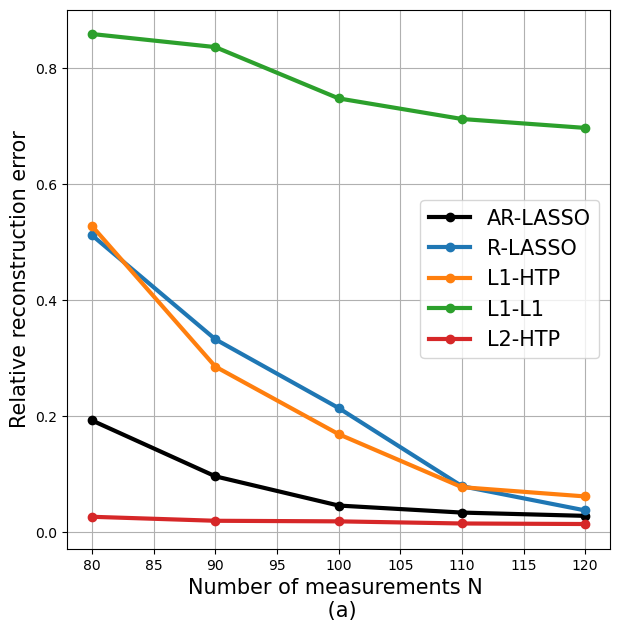

In [14]:
candidates_N = [80, 90, 100, 110, 120]
data = np.array([np.mean(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 0), axis = 0) for N in candidates_N])

plt.figure(figsize = [7, 7])

# data_std = np.array([np.std(np.load("N_Metrics" + str(N) + ".npy").reshape((-1, 9)), axis = 0) for N in candidates_N])
# plt.plot(candidates_N, data[:, 0], label = "AR-LASSO with ZSC", marker = "o", linewidth = 3)
# plt.plot(candidates_N, data[:, 2], label = "R-LASSO with ZSC", marker = "o", linewidth = 3)
# plt.plot(candidates_N, [0.7 * np.sqrt(np.log(N - 32))/np.sqrt(N - 32) for N in candidates_N], label = "Upper bound", marker = "o", linewidth = 3)

plt.plot(candidates_N, data[:, 1], label = "AR-LASSO", marker = "o", linewidth = 3, color = 'k')
plt.plot(candidates_N, data[:, 3], label = "R-LASSO", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 4], label = "L1-HTP", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 5], label = "L1-L1", marker = "o", linewidth = 3)
plt.plot(candidates_N, data[:, 7], label = "L2-HTP", marker = "o", linewidth = 3)


plt.legend(fontsize = 15)
plt.xlabel("Number of measurements N \n (a)", fontsize = 15)
plt.ylabel("Relative reconstruction error", fontsize = 15)
plt.grid()
plt.savefig("N_plot.pdf")

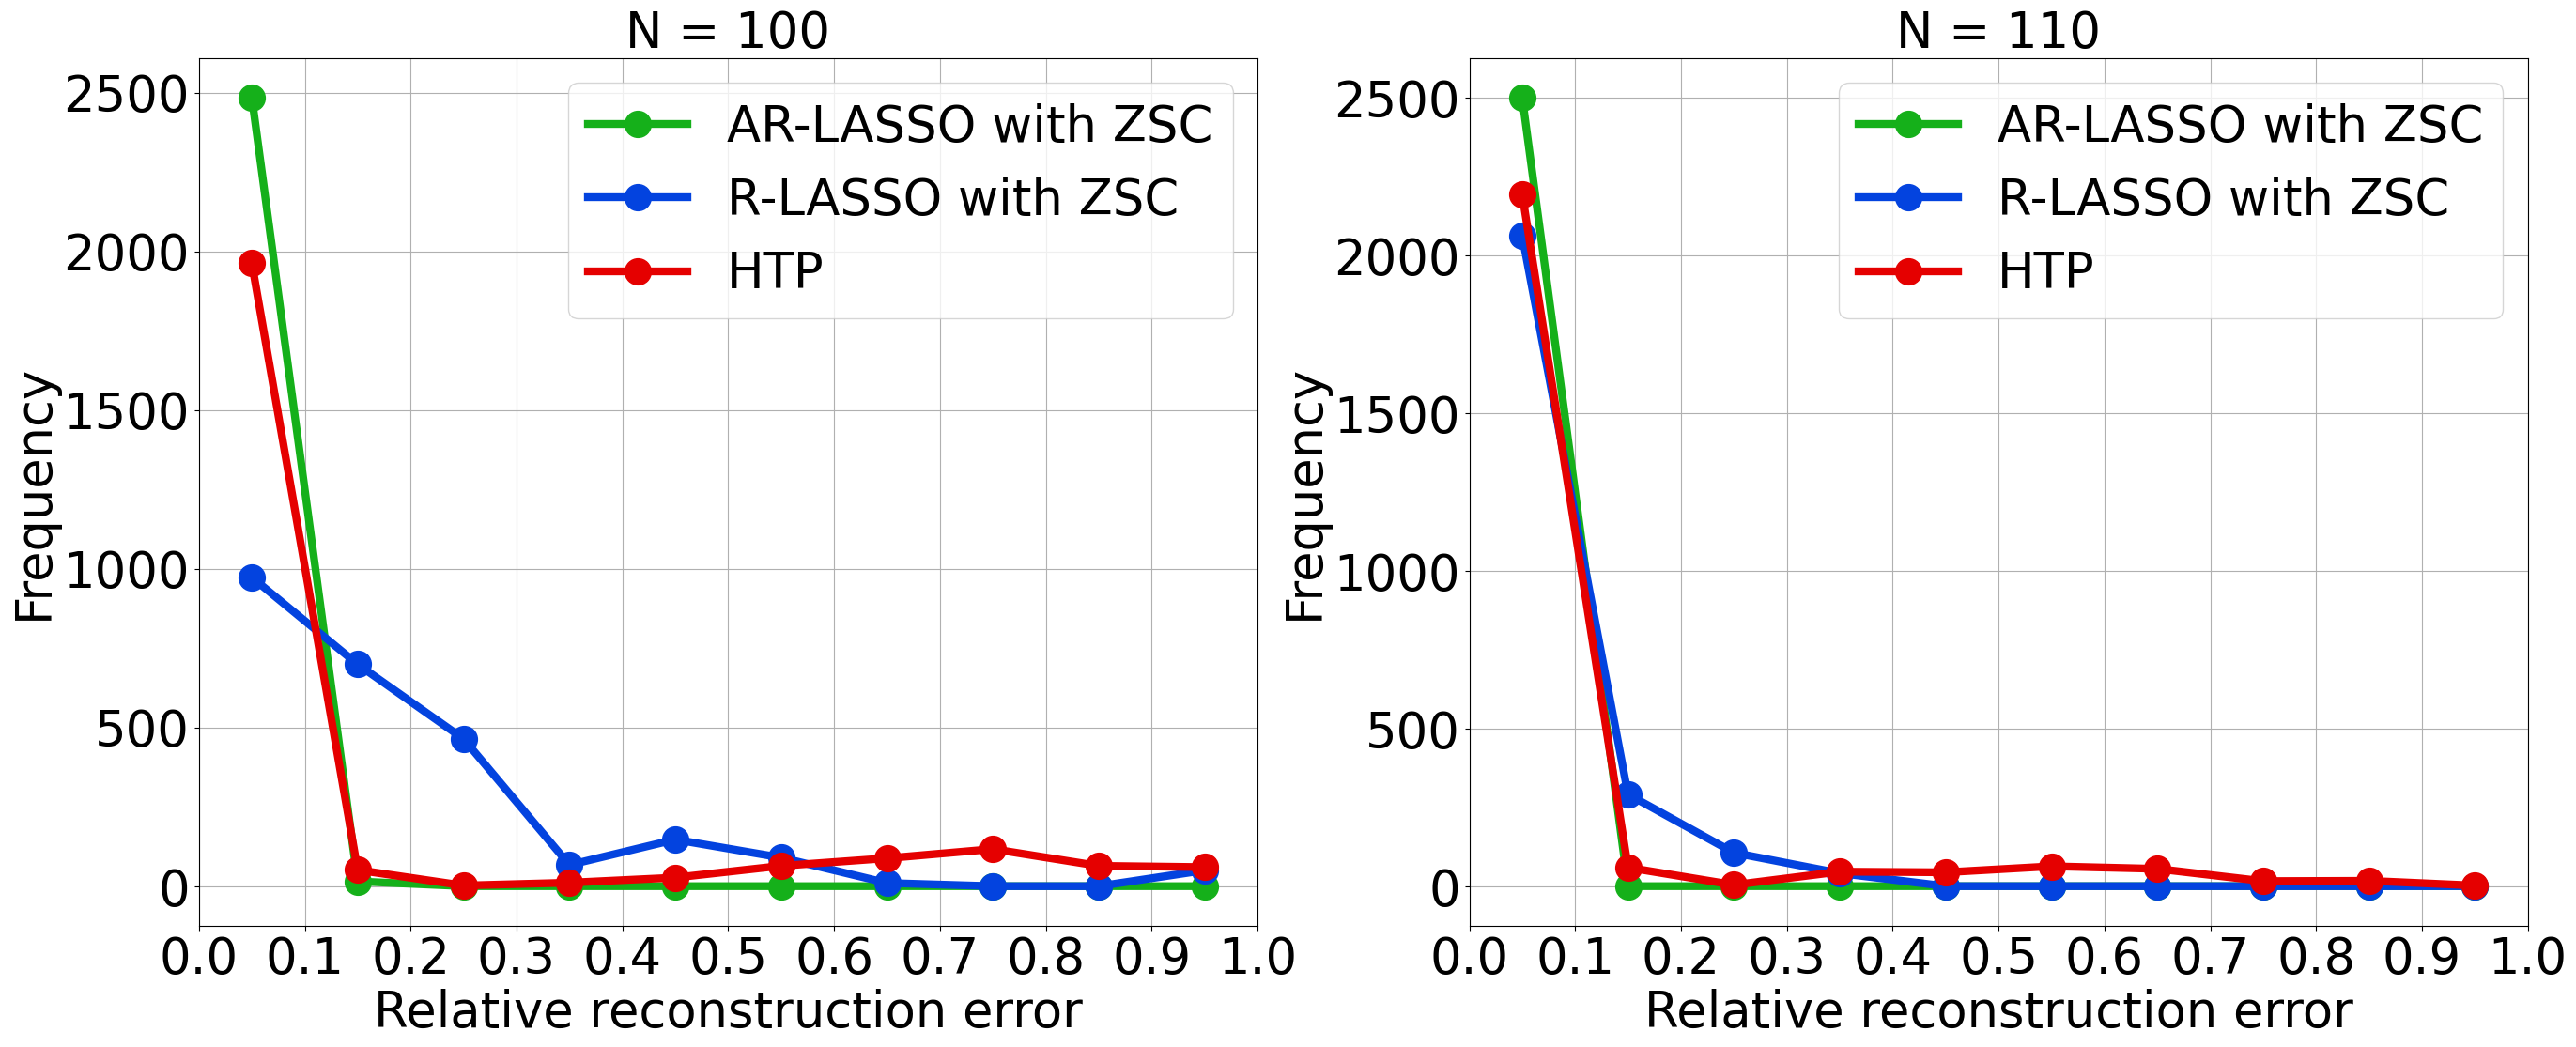

: 

: 

: 

In [ ]:
plt.figure(figsize = [32, 12])
t = 1
fontsize = 38
for N in [100, 110]:
    plt.subplot(1, 2, t)

    # plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 2].reshape((-1)), label = "R-LASSO with ZSC", alpha = 0.7, edgecolor = 'blue', color = 'xkcd:blue')
    # plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 4].reshape((-1)), label = "HTP", alpha = 0.8, edgecolor = 'green', color = 'xkcd:green')
    # plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 0].reshape((-1)), label = "AR-LASSO with ZSC", alpha = 0.8, edgecolor = 'red', color = 'xkcd:red')

    for algo, index, col in [("AR-LASSO with ZSC", 0, 'xkcd:green'), ("R-LASSO with ZSC", 2, 'xkcd:blue'), ("HTP", 4, 'xkcd:red')]:
        # Step 2: Create a frequency distribution
        bins = np.arange(0, 1.1, 0.1)  # Define bin edges
        hist, bin_edges = np.histogram(np.load("N_metrics" + str(N) + ".npy")[:, :, index].reshape((-1)), bins = bins)
        # Step 3: Calculate midpoints of bins
        bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
        # Step 4: Plot the frequency polygon
        plt.plot(bin_midpoints, hist, marker = 'o', label = algo, color = col, linewidth = 6, markersize = 20)


    plt.title("N = {}".format(N), fontsize = fontsize)
    plt.xlim([0, 1])
    plt.yticks(fontsize = fontsize)
    plt.xticks(np.arange(0, 1.1, 0.1), fontsize = fontsize)
    plt.legend(fontsize = fontsize)
    plt.grid()
    plt.ylabel("Frequency", fontsize = fontsize)
    plt.xlabel("Relative reconstruction error", fontsize = fontsize)

    t += 1

plt.savefig("histogram.pdf")






# plt.figure(figsize = [32, 12])
# t = 1
# for N in [100, 120]:
#     plt.subplot(1, 2, t)
#     plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 2].reshape((-1)), bins = 10, label = "R-LASSO with ZSC", alpha = 0.7, edgecolor = 'blue', color = 'xkcd:blue')
#     plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 4].reshape((-1)), bins = 10, label = "HTP", alpha = 0.8, edgecolor = 'green', color = 'xkcd:green')
#     plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 0].reshape((-1)), bins = 10, label = "AR-LASSO with ZSC", alpha = 0.8, edgecolor = 'red', color = 'xkcd:red')

    
#     # plt.legend(fontsize = fontsize)
#     # plt.title("N = {}; AR-LASSO with ZSC".format(N), fontsize = fontsize)
#     plt.title("N = {}".format(N), fontsize = fontsize)
#     plt.xlim([0, 1])
#     plt.yticks(fontsize = fontsize)
#     plt.xticks(fontsize = fontsize)
#     plt.legend(fontsize = fontsize)
    

    # plt.subplot(1, 4, t+1)
    # plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 2].reshape((-1)), label = "N = {}; R-LASSO".format(N), color = 'xkcd:crimson')
    # plt.legend(fontsize = fontsize)
    # plt.title("N = {}; R-LASSO with ZSC".format(N), fontsize = fontsize)
    # plt.xlim([0, 1])
    # plt.yticks(fontsize = fontsize)
    # plt.xticks(fontsize = fontsize)

    # t += 1

# t += 1

# for N in [100, 110]:
#     plt.subplot(2, 5, t)
#     plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 0].reshape((-1)), label = "N = {}; (A1)".format(N), color = 'xkcd:crimson')
#     plt.legend(fontsize = fontsize)
#     plt.xlim([0, 1])

#     plt.subplot(2, 5, t+1)
#     plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 2].reshape((-1)), label = "N = {}; (A3)".format(N), color = 'xkcd:crimson')
#     plt.legend(fontsize = fontsize)
#     plt.xlim([0, 1])

#     t += 2

# N = 120
# plt.subplot(2, 5, 5)
# plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 0].reshape((-1)), label = "N = {}; (A1)".format(N), color = 'xkcd:crimson')
# plt.legend(fontsize = fontsize)
# plt.xlim([0, 1])

# plt.subplot(2, 5, 10)
# plt.hist(np.load("N_metrics" + str(N) + ".npy")[:, :, 2].reshape((-1)), label = "N = {}; (A3)".format(N), color = 'xkcd:crimson')
# plt.legend(fontsize = fontsize)
# plt.xlim([0, 1])



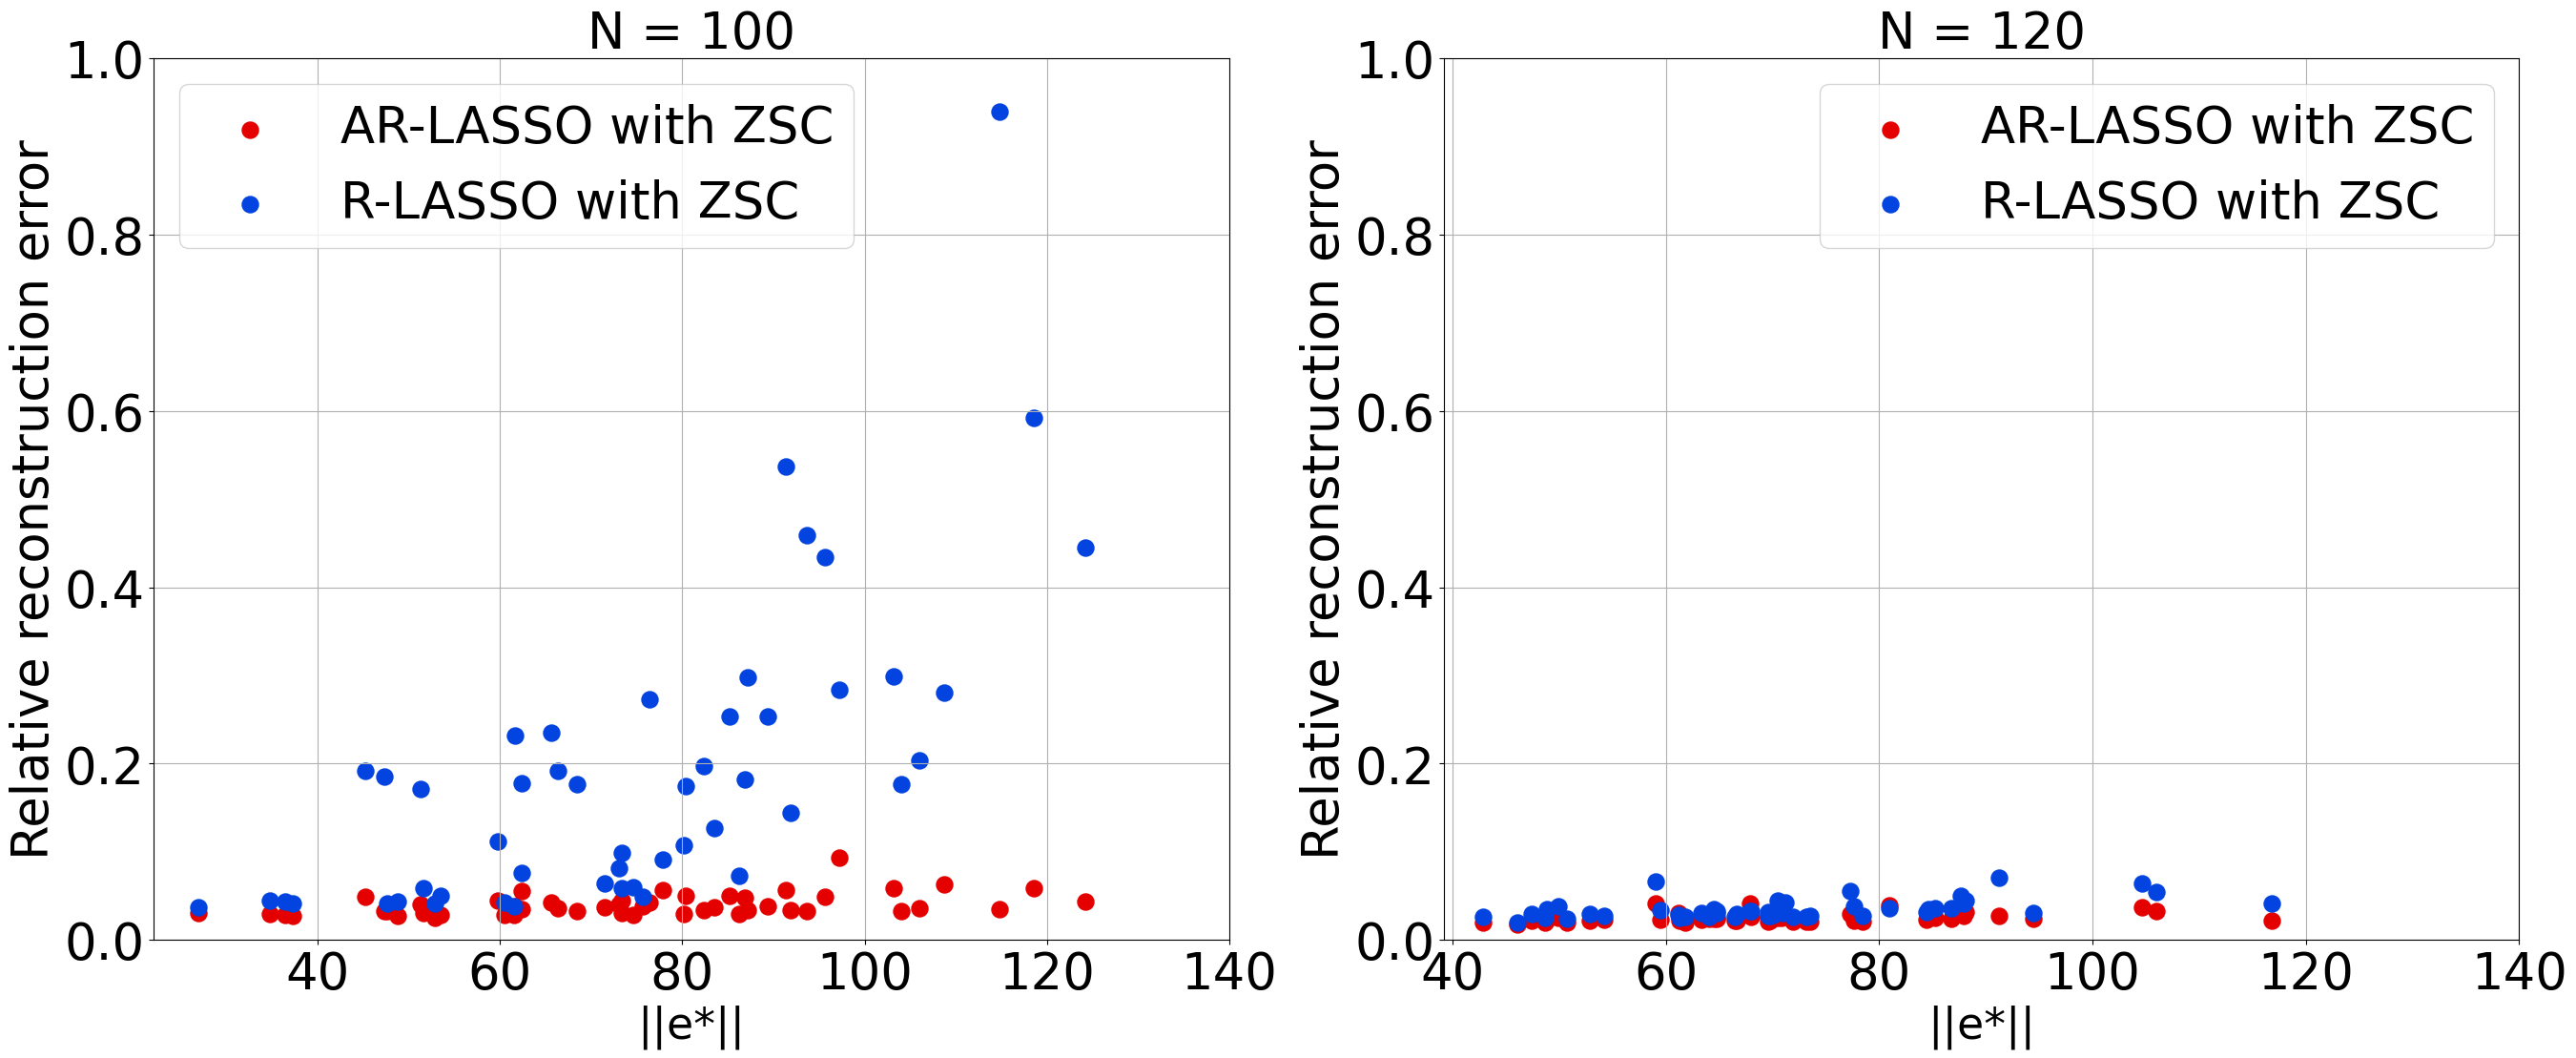

: 

: 

: 

In [ ]:
plt.figure(figsize = [32, 12])
t = 1
fontsize = 38
for N in [100, 120]:

    plt.subplot(1, 2, t)
    plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 0].reshape((-1)), label = "AR-LASSO with ZSC", color = 'xkcd:red', s = 150)
    plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 2].reshape((-1)), label = "R-LASSO with ZSC", color = 'xkcd:blue', s = 150)
    plt.xlabel("||e*||", fontsize = fontsize - 5)
    plt.ylabel("Relative reconstruction error", fontsize = fontsize)
    # plt.title("N = {}; AR-LASSO with ZSC".format(N), fontsize = fontsize)
    plt.title("N = {}".format(N), fontsize = fontsize)
    plt.grid()
    plt.ylim(0, 1)
    plt.xticks([40, 60, 80, 100, 120, 140])
    plt.yticks(fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.legend(fontsize = fontsize)

    # plt.subplot(1, 2, t+1)
    # plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 2].reshape((-1)), label = "R-LASSO with ZSC", color = 'xkcd:crimson', s = 120)
    # plt.xlabel("||e*||", fontsize = fontsize-3)
    # plt.ylabel("Error", fontsize = fontsize)
    # plt.title("N = {}; R-LASSO with ZSC".format(N), fontsize = fontsize)
    # plt.grid()
    # plt.ylim(0, 1)
    # plt.xticks([40, 60, 80, 100, 120, 140])
    # plt.yticks(fontsize = fontsize)
    # plt.xticks(fontsize = fontsize)

    t += 1

# t += 1

# for N in [100, 110]:
    
#     plt.subplot(2, 5, t)
#     plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 0].reshape((-1)), label = "(A1)", color = 'xkcd:purple')
#     plt.xlabel("||e*||", fontsize = fontsize-3)
#     plt.ylabel("Error", fontsize = fontsize)
#     plt.title("N = {}; (A1)".format(N), fontsize = fontsize-3)
#     plt.grid()
#     plt.ylim(0, 1)

#     plt.subplot(2, 5, t+1)
#     plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 2].reshape((-1)), label = "(A3)", color = 'xkcd:purple')
#     plt.xlabel("||e*||", fontsize = fontsize-3)
#     plt.ylabel("Error", fontsize = fontsize)
#     plt.title("N = {}; (A3)".format(N), fontsize = fontsize-3)
#     plt.grid()
#     plt.ylim(0, 1)

#     t += 2


# N = 120
# plt.subplot(2, 5, 5)
# plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 0].reshape((-1)), label = "(A1)", color = 'xkcd:purple')
# plt.xlabel("||e*||", fontsize = fontsize-3)
# plt.ylabel("Error", fontsize = fontsize)
# plt.title("N = {}; (A1)".format(N), fontsize = fontsize-3)
# plt.grid()
# plt.ylim(0, 1)

# plt.subplot(2, 5, 10)
# plt.scatter(np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 8].reshape((-1)), np.mean(np.load("N_metrics" + str(N) + ".npy"), axis = 1)[:, 2].reshape((-1)), label = "(A3)", color = 'xkcd:purple')
# plt.xlabel("||e*||", fontsize = fontsize-3)
# plt.ylabel("Error", fontsize = fontsize)
# plt.title("N = {}; (A3)".format(N), fontsize = fontsize-3)
# plt.grid()
# plt.ylim(0, 1)

plt.savefig("correlation.pdf")

In [2]:
np.load("N_metrics" + str(110) + ".npy")[49]

array([[ 0.026003281,  0.026268972,  0.058623033,  0.05552151 ,
         0.012493836,  0.687723526,  0.702802739,  0.016235096,
        67.014192417],
       [ 0.031234584,  0.031673753,  0.077526898,  0.080508786,
         0.072699563,  0.687558729,  0.794099637,  0.014174072,
        67.014192417],
       [ 0.022948307,  0.022955604,  0.066051019,  0.068222654,
         0.01328231 ,  0.696642655,  0.776622603,  0.013206112,
        67.014192417],
       [ 0.029030725,  0.030179559,  0.047234261,  0.054812748,
         0.013664691,  0.67548369 ,  0.804697327,  0.010942668,
        67.014192417],
       [ 0.024888464,  0.025097019,  0.06790256 ,  0.06070553 ,
         0.076606595,  0.694737253,  0.737344847,  0.017224601,
        67.014192417],
       [ 0.029525488,  0.029347331,  0.059090334,  0.075984211,
         0.011169991,  0.694450265,  0.750024158,  0.012054788,
        67.014192417],
       [ 0.026830058,  0.027976548,  0.083164721,  0.086363341,
         0.011512875,  0.68854

(array([2491.,    0.,    0.,    0.,    2.,    1.,    4.,    1.,    0.,
           1.]),
 array([0.010515628, 0.166064326, 0.321613025, 0.477161723, 0.632710422,
        0.78825912 , 0.943807818, 1.099356517, 1.254905215, 1.410453914,
        1.566002612]),
 <BarContainer object of 10 artists>)

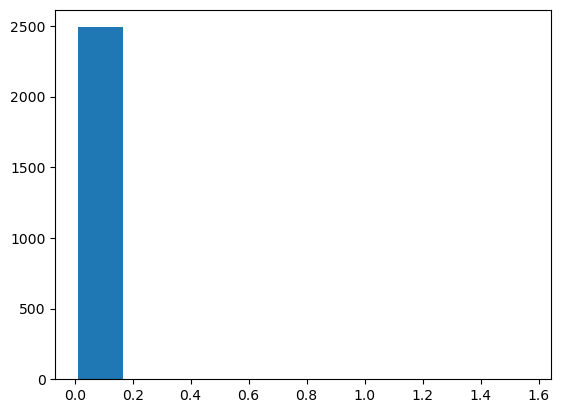

In [13]:
temp = np.load('N_Metrics' + str(80) + '.npy').reshape((-1, 9))

# for i in range(50):
#     for j in range(50):
#         if temp[i][j][7] > 0.2:
#             print(i, j)

# temp[13][11][7]

plt.hist(temp[:, 7])

In [16]:
print(4.7 * len([i * (1e-1) for i in range(1, 10, 2)] + [i * (1e-2) for i in range(1, 10, 2)] + [i * (1e-3) for i in range(1, 10, 2)] ))

70.5
